# Classifying Toxic Wikipedia Comments

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path

## Preparing the data

First let's download the dataset we are going to study. The [dataset](http://ai.stanford.edu/~amaas/data/sentiment/) has been curated by Andrew Maas et al. and contains a total of 100,000 reviews on IMDB. 25,000 of them are labelled as positive and negative for training, another 25,000 are labelled for testing (in both cases they are highly polarized). The remaning 50,000 is an additional unlabelled data (but we will find a use for it nonetheless).

We'll begin with a sample we've prepared for you, so that things run quickly before going over the full dataset.

In [3]:
path = Path('data')
path.ls()

[PosixPath('data/sample_submission.csv'),
 PosixPath('data/train.csv'),
 PosixPath('data/test.csv'),
 PosixPath('data/test_labels.csv')]

It only contains one csv file, let's have a look at it.

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.loc[df['severe_toxic'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0
746,020316a0de9e0406,"""You know, I was thinking...\n\nNobody really ...",1,1,1,0,0,0
756,0207005a6576eafc,"Here's an idea \n\nGo fuck yourself, cumshitter.",1,1,1,0,1,0
761,0209cdf3131130ed,""" WILL MY MOTHERFUCKING SAFETY BE GUARANTEED?...",1,1,1,0,1,0
887,026bd33490542b2e,"you gay motherfucker i know where you live,i a...",1,1,1,0,1,1
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1


It contains one line per review, with the label ('negative' or 'positive'), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code:

In [5]:
df = df.drop(['id','severe_toxic','obscene','threat','insult','identity_hate'],axis=1)

## Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [6]:
bs=84

Now let's grab the full dataset for what follows.

The reviews are in a training and test set following an imagenet structure. The only difference is that there is an `unsup` folder on top of `train` and `test` that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [7]:
data_lm = (TextList.from_df(df,'.')
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('tmp_lm')

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [8]:
data_lm = TextLMDataBunch.load('.', 'tmp_lm', bs=bs)

In [9]:
data_lm.show_batch()

idx,text
0,"background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ) xxbos "" \n xxmaj more \n i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of "" "" types of accidents "" "" xxup -i think the references may need"
1,"things from happening , it would seem to me , not to exclude good things by statute . xxmaj so the reliable source rules are something i would like to discuss a bit more at length . "" xxbos "" \n\n xxmaj let 's see if i can answer in an orderly fashion : \n\n xxmaj lead \n\n xxmaj the point is that it was very much his own"
2,"get involved . xxmaj sometimes a executive decision needs to be made that is unpopular but fair and this does appear to be a fair request . xxbos xxmaj jehovah ’s xxmaj witnesses and blood xxunk \n xxmaj thanks for your assistance at improving this article . i am happy to provide any of the reference material cited therein if and when you choose to continue on the subject ,"
3,yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck yourself ! xxmaj go fuck
4,"facts . xxmaj and , as such we are going to ask that you ... "" "" xxmaj please discontinue removing the xxmaj urantia xxmaj readers - xxmaj intl group and replacing it with the xxmaj fellowship link "" "" . xxmaj see how that works in contrast ? xxmaj so you want to play sound games , or do you want to fight fire with fire xxrep 4 ."


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [11]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


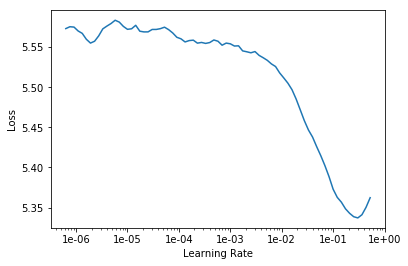

In [13]:
learn.recorder.plot(skip_end=15)

In [14]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.797785,4.576087,0.261697


In [15]:
learn.save('fit_head')

In [16]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.164793,4.110602,0.315545


In [19]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [20]:
learn.load('fine_tuned');

In [21]:
TEXT = "Why did you change my goddamn"
N_WORDS = 40
N_SENTENCES = 2

In [22]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Why did you change my goddamn ? xxmaj cheers , 

 xxmaj did you know your mother , you might have forgotten another week , and you have a reply to me . i do n't care about it but you 've through ' block '
Why did you change my goddamn or wiki ? xxmaj you can make a mistake from the xxmaj german xxmaj board of xxmaj anthropological xxmaj program . xxmaj if you do n't like this , i am not going to be doing so . i feel


We not only have to save the model, but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [23]:
learn.save_encoder('fine_tuned_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [24]:
path = ''

In [26]:
data_clas = (TextList.from_df(df,'.', vocab=data_lm.vocab)
             #grab all the text files in path
             .random_split_by_pct(0.1)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='toxic')
             #label them based on toxic 1 or 0
             .databunch(bs=bs))

data_clas.save('tmp_clas')

In [27]:
data_clas = TextClasDataBunch.load(path, 'tmp_clas', bs=bs)

In [28]:
data_clas.show_batch()

text,target
xxbos xxmaj take that ! \n\n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the,1
xxbos xxup anyone xxup who xxup supports xxup this xxup is xxup fucking xxup sick . xxup men xxup and xxup xxunk xxup fucking xxup kids xxrep 30 ? xxup what xxup in xxup the xxup fuck xxup you xxup all xxup should xxup be xxup shot xxup and xxup killed xxup you xxup bunch xxup of xxup fucking xxup faggot xxup pedophiles \n\n xxwrep 4 xxup die xxup,1
"xxbos "" \n\n xxmaj fourth xxmaj examination , 17th xxmaj december , 1455 . [ xxmaj additional statements . ] \n xxmaj the sum of a thousand pounds , or crowns , was given by the xxmaj king of xxmaj england for the surrender of the xxmaj maid ; and an annuity of 300 pounds to the soldier of the xxmaj duke of xxmaj burgundy who had captured her .",0
"xxbos "" xxmaj jokes \n xxmaj how does xxmaj helen xxmaj keller drive ? xxmaj one hand on the wheel and one hand one the road ! \n\n xxmaj first name : xxmaj brittany \n joke : xxmaj how do you xxmaj punish xxmaj hellen xxmaj keller ? 1- xxmaj xxunk the xxmaj furniture 2- xxmaj give her a basketball and tell her to read it . 3- tell",0
"xxbos "" \n\n xxmaj newly xxmaj discovered xxmaj documentary xxmaj evidence xxmaj that xxmaj affects this xxmaj article 's xxmaj accuracy \n\n i have recently found a 1979 booklet of questions and answers with xxmaj rawat printed and distributed by xxmaj divine xxmaj light xxmaj mission , xxmaj inc. which bears heavily on some of the issues central to this article . xxmaj this document was published at least",0


We can then create a model to classify those reviews and load the encoder we saved before.

In [29]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


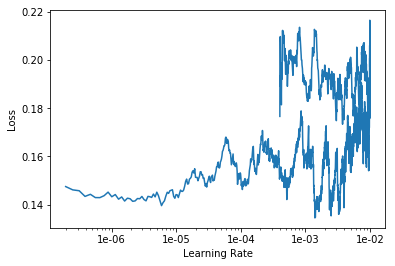

In [37]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.231590,0.176020,0.933446


In [33]:
learn.save('first')

In [34]:
learn.load('first');

In [35]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.142199,2.446613,0.948111


In [36]:
learn.save('second')

In [38]:
learn.load('second');

In [39]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.146942,0.166946,0.961271


In [40]:
learn.save('third')

In [41]:
learn.load('third');

In [42]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.121452,0.667128,0.956633
2,0.117206,0.540716,0.955004


In [44]:
learn.load('third');

In [78]:
learn.predict(".")

(Category 0, tensor(0), tensor([0.9114, 0.0886]))

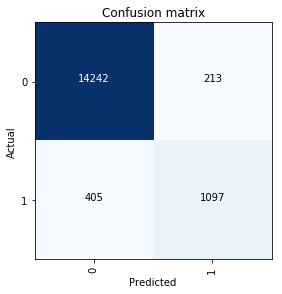

In [81]:
from fastai.vision import *
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data_clas, preds, y, losses)
interp.plot_confusion_matrix()